In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, chi2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import os

In [2]:
def load_data(data_path):
    f = open(data_path)
    features = []
    targets = []
    
    for line in f: 
        split_line = line.split(",")
        target_var = split_line.pop(0)
        features.append([float(x) for x in split_line])
        targets.append(float(target_var))
    f.close()
    features = np.array(features)
    targets = np.array(targets)
    return features, targets

In [3]:
features, targets = load_data("C:/Users/selin/Documents/GitHub/spring2021-hw8-selincetin/YearPredictionMSD.txt")

In [11]:
min_val = np.amin(targets)
max_val = np.amax(targets)
print(min_val, max_val)
new_years = np.arange(1920, 2016, 5)
new_years = new_years.tolist()
new_tar = np.empty((targets.shape))
for jj, tar in enumerate(targets):
    for ii, year in enumerate(new_years):
        if tar >= year and tar < (year + 5):
            new_tar[jj] = year 

1922.0 2011.0
[2001. 2001. 2001. 2001. 2001. 2001. 2001. 2001. 2001. 2007. 2008. 2002.
 2004. 2003. 1999. 2003. 2002. 1992. 1997. 1987. 2000. 2000. 2005. 2000.
 1997. 1997. 1996. 1997. 1997. 1997. 1997. 1997. 1997. 1997. 1997. 1998.
 2000. 2000. 2001. 2000. 2000. 2000. 2000. 2000. 1998. 2000. 2000. 2000.
 2000. 2003. 2003. 2001. 2003. 2001. 2003. 2003. 2003. 2003. 2003. 2003.
 2003. 2003. 2007. 2007. 2007. 2007. 2009. 2009. 2009. 2009. 2009. 2009.
 2009. 2009. 2009. 2009. 2009. 2009. 2009. 2009. 2008. 2009. 2009. 2009.
 2009. 2008. 2008. 2009. 2009. 2008. 2008. 2009. 2009. 2009. 2008. 2008.
 2007. 2008. 2007. 2008.]
[2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2005. 2005. 2000.
 2000. 2000. 1995. 2000. 2000. 1990. 1995. 1985. 2000. 2000. 2005. 2000.
 1995. 1995. 1995. 1995. 1995. 1995. 1995. 1995. 1995. 1995. 1995. 1995.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 1995. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000

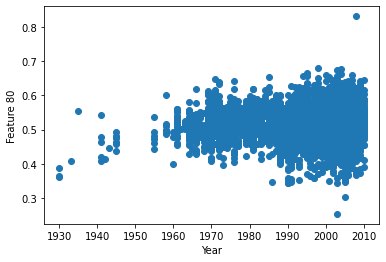

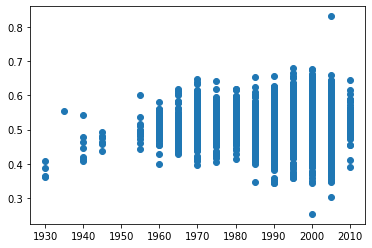

In [49]:
plt.scatter(targets[0:10000], features[0:10000, 6])
plt.xlabel("Year")
plt.ylabel("Feature 80")
plt.figure()
plt.scatter(new_tar[0:10000], features[0:10000, 6])
plt.show()

In [41]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features)

train_feat = features[0:463715]
train_tar = new_tar[0:463715]

chi_2, p_values = chi2(train_feat, train_tar)
min_10 = np.argsort(p_values)
min_10 = min_10[0:10]
print(min_10)

new_feat = np.empty((features.shape[0], 10))
for ii in range(0, 10):
    new_feat[:,ii] = features[:, min_10[ii]]

train_feat = new_feat[0:463715]
test_feat = new_feat[463715:]
train_tar = new_tar[0:463715]
test_tar = new_tar[463715:]
#feat_select = RFE(estimator=KNeighborsRegressor(), n_features_to_select=15, verbose=5)


[ 0  5 19 13  1 21 15  2 22 20]


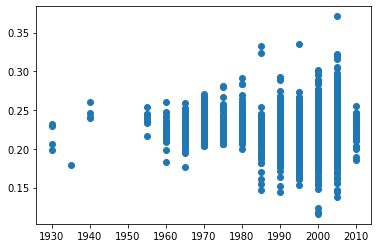

In [38]:
feat_means = np.mean(train_feat, axis=1)

for jj, tar in enumerate(train_feat):
    for ii, year in enumerate(new_years):
        if tar >= year and tar < (year + 5):
            new_tar[jj] = year 


In [13]:

#reg = feat_select.fit(train_feat, train_tar)
#reg = LinearRegression().fit(train_feat, train_tar)
reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(train_feat, train_tar)

KNeighborsRegressor(n_neighbors=10)

In [14]:
#print(r2_score(reg.predict(train_feat), train_tar))
pred_tar = reg.predict(test_feat[0:10000])

In [15]:
print(pred_tar.astype(int)[0:50])
print(test_tar[0:50])
acc = np.mean(pred_tar.astype(int) == test_tar[0:10000])
print(acc)
print(mean_squared_error(test_tar[0:10000], pred_tar, squared=False))

[1990 1999 1999 2001 2000 1992 2003 1996 1993 2003 2002 2000 2000 2002
 2002 2001 2003 2001 1998 2002 2002 1997 2000 2002 2002 2000 2003 2002
 1999 2002 2003 1998 1998 1995 1996 1991 1995 1999 2001 2001 2001 2002
 2003 1993 1997 2003 2004 2002 2003 2002]
[2005. 2000. 2005. 2000. 2005. 2005. 2000. 2000. 2000. 2005. 2005. 2005.
 2005. 2000. 2005. 2000. 2005. 2005. 2005. 2005. 2005. 2005. 2005. 2005.
 2005. 2005. 2005. 2005. 2010. 2010. 2010. 2010. 2010. 2010. 2010. 2010.
 2010. 2005. 2000. 2000. 2005. 2005. 2005. 2010. 2005. 2005. 2005. 2005.
 2005. 2005.]
0.0446
9.936275710747966
